<a href="https://colab.research.google.com/github/fatirul/assets/blob/main/Proyek_Analisis_Data_fateirul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Analisis Data: E-Commerce Public Dataset**
- **Nama:** Khoirul Fatah
- **Email:** irulfateh8@gmail.com
- **ID Dicoding:** irulfateh

## **Menentukan Pertanyaan Bisnis**

- Pertanyaan 1: Apa saja atribut dan transformasi order pelanggan dari waktu ke waktu?
- Pertanyaan 2: Siapa pelanggan yang dianggap terbaik, dan bagaimana cara membagi pelanggan berdasarkan pesanan terakhir, frekuensi order, serta nilai total pesanannya?

## **Import Semua Packages/Library yang Digunakan**

In [6]:
pip install pandas

In [7]:
import pandas as pd

In [8]:
import requests

In [9]:
pip install numpy

In [10]:
import numpy as np

In [11]:
pip install matplotlib

In [12]:
import matplotlib.pyplot as plt

In [13]:
pip install seaborn

In [2]:
import seaborn as sns

In [3]:
! chmod 600 /content/sample_data/kaggle.json

In [4]:
! KAGGLE_CONFIG_DIR=/content/sample_data/ kaggle datasets download -d olistbr/brazilian-ecommerce

 80% 34.0M/42.6M [00:00<00:00, 158MB/s]
100% 42.6M/42.6M [00:00<00:00, 169MB/s]


In [5]:
import zipfile
zip_file = zipfile.ZipFile('/content/brazilian-ecommerce.zip', 'r')
zip_file.extractall('/tmp/kaggle')

## **Data Wrangling**

### **Gathering Data**

Sumber data diambil dari: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

In [14]:
import pandas as pd

In [15]:
customers = pd.read_csv('/tmp/kaggle/olist_customers_dataset.csv')
print(customers)

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0  

In [16]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
sellers = pd.read_csv('/tmp/kaggle/olist_sellers_dataset.csv')
print(sellers)

                             seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     bragan

In [18]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [19]:
geolocation = pd.read_csv('/tmp/kaggle/olist_geolocation_dataset.csv')
print(geolocation)
geolocation.head()

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao pa

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [20]:
order_items = pd.read_csv('/tmp/kaggle/olist_order_items_dataset.csv')
print(order_items)
order_items.head()

                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242a

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
order_payments = pd.read_csv('/tmp/kaggle/olist_order_payments_dataset.csv')
print(order_payments)
order_payments.head()

                                order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
order_reviews = pd.read_csv('/tmp/kaggle/olist_order_reviews_dataset.csv')
print(order_reviews)
order_reviews.head()

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4            

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [23]:
orders = pd.read_csv('/tmp/kaggle/olist_orders_dataset.csv')
print(orders)
orders.head()

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
products = pd.read_csv('/tmp/kaggle/olist_products_dataset.csv')
print(products)
products.head()

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
product_category = pd.read_csv('/tmp/kaggle/product_category_name_translation.csv')
print(product_category)
product_category.head()

            product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### **Assessing Data**

**Menilai Tabel Customers**

In [26]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [27]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", customers.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Menilai Tabel Sellers**

In [30]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [32]:
print("Jumlah duplikasi: ", sellers.duplicated().sum())

Jumlah duplikasi:  0


In [33]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Menilai Tabel Geolocation**

In [34]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [35]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [36]:
print("Jumlah duplikasi: ", geolocation.duplicated().sum())

Jumlah duplikasi:  261831


In [37]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Menilai Tabel Order_items**

In [38]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [39]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [40]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())

Jumlah duplikasi:  0


In [41]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Menilai Tabel Order_payments**

In [42]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [43]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [44]:
print("Jumlah duplikasi: ", order_payments.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Menilai Tabel Order_reviews**

In [46]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [47]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [48]:
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())

Jumlah duplikasi:  0


In [49]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Menilai Tabel Orders**

In [50]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [51]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [52]:
print("Jumlah duplikasi: ", orders.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Menilai Tabel Products**

In [54]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [55]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [56]:
print("Jumlah duplikasi: ", products.duplicated().sum())

Jumlah duplikasi:  0


In [57]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Menilai Tabel Product_category**

In [58]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [59]:
product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [60]:
print("Jumlah duplikasi: ", product_category.duplicated().sum())

Jumlah duplikasi:  0


In [61]:
product_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### **Cleaning Data**

**Membersihkan Tabel Customers**

*Duplicate data*

In [62]:
customers.duplicated().sum()

0

*Missing Values*

In [63]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [64]:
customers.groupby('customer_unique_id').size().sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Length: 96096, dtype: int64

**Membersihkan Tabel geolocation**

In [65]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
556363,30692,-19.989049,-44.053506,belo horizonte,MG
704538,48902,-9.416460,-40.514119,juazeiro,BA
716944,54430,-8.195085,-34.931079,jaboatao dos guararapes,PE
297885,13207,-23.203834,-46.885652,jundiai,SP
861044,83203,-25.518603,-48.506908,paranagua,PR


Tidak ada nilai nol untuk geolokasi

In [66]:
geolocation.isna().mean()

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

Seperti yang bisa kita lihat, ada duplikat kota dengan aksen pada namanya.

In [67]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [68]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [69]:
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [70]:
geolocation[geolocation['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


**Membersihkan Tabel order_items**

In [71]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
999,025321e4e9674e090b7bc101f9c5ab5a,1,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2017-06-26 22:10:14,59.9,50.92
29400,42da631a2f5302608f86e8cee55b8d40,2,b0961721fd839e9982420e807758a2a6,1f50f920176fa81dab994f9023523100,2018-02-13 03:10:53,49.9,24.61
40904,5d2c4c38fbd5a94f21fc1f9c2bad2696,1,93c902b021a9e594f658ab1b0351602a,2e90cb1677d35cfe24eef47d441b7c87,2018-03-30 12:30:40,97.9,11.31
85550,c255d417bffb18b3c55955e368d2da81,1,6bb81626d06fafb4d7eab61ac9ed70c6,c161d1327ebc3a156c09582ab2f59f6c,2017-08-10 14:05:26,22.0,7.78
86644,c4cffa375b754170e9823a1fe9ac75bb,1,f0087499874ae6c0b14f7b42671519fc,41b14765bd56c8ad10971074380f9c0c,2018-08-01 16:45:36,85.0,11.62


Tidak ada nilai nol untuk pesanan_item

In [72]:
order_items.isna().mean()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

Seperti yang bisa kita lihat, satu pesanan bisa memiliki lebih dari satu produk.

In [73]:
order_items.groupby('order_id').size().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Length: 98666, dtype: int64

In [85]:
print('Jumlah duplikasi data: ', joined_df1.duplicated().sum())
joined_df1.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usa

Dalam tabel, terdapat kesalahan tipe data pada kolom tanggal serta duplikasi data dan data tidak lengkap pada beberapa kolom.

In [86]:
joined_df1.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Karena perbedaan pada order_status, hanya kolom tanggal yang kekurangan nilai.

In [87]:
joined_df1.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99281,97658,96476,99441,99441,99441.000000,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96478,3,9,47,3,522,17,NaN,15540,41746
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58900.000000,NaN,NaN


Nama negara bagian dan kota tidak menggunakan huruf kapital, dan nama kota tidak menggunakan huruf kapital.

In [88]:
print('Jumlah duplikasi data: ', joined_df2.duplicated().sum())
joined_df2.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   seller_zip_code_prefix         112650 non-null  int64  
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  product_category_name          111047 non-null  object 
 11  product_name_lenght            111047 non-null  float64
 12  prod

Tabel tidak berisi data duplikat atau data tidak lengkap dalam beberapa kolom.

In [89]:
joined_df2.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1627
dtype: int64

In [90]:
city_name = []
for i in range(0, len(joined_df1["customer_city"])):
  a = " ".join([s.capitalize() if s.lower() not in "da|de|do|das|dos" else s for s in joined_df1["customer_city"][i].split()])
  city_name.append(a)

joined_df1["customer_city"] = pd.DataFrame(city_name)

In [91]:
seller_city_name = []
for i in range(0, len(joined_df2["seller_city"])):
  a = " ".join([s.capitalize() if s.lower() not in "da|de|do|das|dos" else s for s in joined_df2["seller_city"][i].split()])
  seller_city_name.append(a)

joined_df2["seller_city"] = pd.DataFrame(seller_city_name)

In [92]:
state_name = {
"AR" : "Acre",
"AG" : "Alagoas",
"AZ" : "Amazonas",
"AM" : "Amapa",
"BH" : "Bahia",
"CA" : "Ceara",
"DL" : "Distrito Federal",
"EO" : "Espirito Santo",
"GS" : "Goias",
"MO" : "Maranhao",
"MS" : "Minas Gerais",
"MG" : "Mato Grosso do Sul",
"MA" : "Mato Grosso",
"PR" : "Para",
"PA" : "Paraiba",
"PO" : "Pernambuco",
"PU" : "Piaui",
"PN" : "Parana",
"RI" : "Rio de Janeiro",
"RE" : "Rio Grande do Norte",
"RA" : "Rondonia",
"RM" : "Roraima",
"RG" : "Rio Grande do Sul",
"SC" : "Santa Catarina",
"SG" : "Sergipe",
"SO" : "Sao Paulo",
"TS" : "Tocantins"
}

joined_df1['customer_state'] = joined_df1['customer_state'].map(state_name)
joined_df2['seller_state'] = joined_df2['seller_state'].map(state_name)
joined_df1[['customer_city','customer_state']].head()

,customer_city,customer_state
0,Sao Paulo,NaN
1,Barreiras,NaN
2,Vianopolis,NaN
3,Sao Goncalo do Amarante,NaN
4,Santo Andre,NaN


In [93]:
joined_df2[['seller_city','seller_state']].head()

,seller_city,seller_state
0,Volta Redonda,NaN
1,Sao Paulo,NaN
2,Borda da Mata,Mato Grosso do Sul
3,Franca,NaN
4,Loanda,Para


In [94]:
joined_df1 = joined_df1.rename(columns={"order_purchase_timestamp": "order_date",
                                        "order_approved_at": "approved_date",
                                        "order_delivered_carrier_date": "shipped_date",
                                        "order_delivered_customer_date": "delivery_date"}
                               )

In [95]:
joined_df1 = joined_df1.drop(columns= ['customer_zip_code_prefix','order_estimated_delivery_date'], axis=1)

In [96]:
dt_columns = ['order_date', 'approved_date', 'shipped_date', 'delivery_date']

for column in dt_columns:
  joined_df1[column] = pd.to_datetime(joined_df1[column])

joined_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            99441 non-null  object        
 1   customer_id         99441 non-null  object        
 2   order_status        99441 non-null  object        
 3   order_date          99441 non-null  datetime64[ns]
 4   approved_date       99281 non-null  datetime64[ns]
 5   shipped_date        97658 non-null  datetime64[ns]
 6   delivery_date       96476 non-null  datetime64[ns]
 7   customer_unique_id  99441 non-null  object        
 8   customer_city       99441 non-null  object        
 9   customer_state      22902 non-null  object        
dtypes: datetime64[ns](4), object(6)
memory usage: 10.4+ MB


In [97]:
print("Jumlah NaN pada kolom 'product_category_name_english':", joined_df2.product_category_name_english.isnull().sum())
print("Jumlah NaN pada kolom 'product_category_name_english', tapi tidak NaN pada kolom 'product_category_name':",
      joined_df2.product_category_name_english.loc[joined_df2.product_category_name_english.isna() &
                                                   joined_df2.product_category_name.notnull()].isnull().sum())

Jumlah NaN pada kolom 'product_category_name_english': 1627
Jumlah NaN pada kolom 'product_category_name_english', tapi tidak NaN pada kolom 'product_category_name': 24


In [98]:
joined_df2.product_category_name.loc[joined_df2.product_category_name_english.isna() & joined_df2.product_category_name.notnull()].unique()

array(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

In [99]:
joined_df2[['product_category_name','product_category_name_english']].loc[joined_df2.product_category_name.isna()].reset_index()

,index,product_category_name,product_category_name_english
0,123,NaN,NaN
1,125,NaN,NaN
2,132,NaN,NaN
3,142,NaN,NaN
4,171,NaN,NaN
...,...,...,...
1598,112306,NaN,NaN
1599,112333,NaN,NaN
1600,112350,NaN,NaN
1601,112438,NaN,NaN


Terdapat 1603 baris yang missing value pada kedua kolom yaitu product_category_name dan product_category_name_english.

In [100]:
for i in list(joined_df2.loc[joined_df2.product_category_name_english.isna()].index):
  if joined_df2['product_category_name'].iloc[i] == 'pc_gamer':
    joined_df2['product_category_name_english'].iloc[i] = 'pc_gaming'
  elif joined_df2['product_category_name'].iloc[i] == 'portateis_cozinha_e_preparadores_de_alimentos':
    joined_df2['product_category_name_english'].iloc[i] = 'portable_kitchen_and_food_preparers'
  else:
    joined_df2['product_category_name_english'].iloc[i] = 'other_products'

<ipython-input-100-95e53bf0ee81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df2['product_category_name_english'].iloc[i] = 'other_products'
<ipython-input-100-95e53bf0ee81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df2['product_category_name_english'].iloc[i] = 'portable_kitchen_and_food_preparers'
<ipython-input-100-95e53bf0ee81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df2['product_category_n

In [101]:
category_name = []
for i in range(0, len(joined_df2["product_category_name_english"])):
  a = " ".join([s.capitalize() if s.lower() != "and" else s for s in joined_df2["product_category_name_english"][i].split("_")])
  category_name.append(a)

joined_df2["product_category"] = pd.DataFrame(category_name)
joined_df2[["product_category_name_english","product_category"]].head()

,product_category_name_english,product_category
0,cool_stuff,Cool Stuff
1,pet_shop,Pet Shop
2,furniture_decor,Furniture Decor
3,perfumery,Perfumery
4,garden_tools,Garden Tools


In [102]:
joined_df2.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
seller_zip_code_prefix               0
seller_city                          0
seller_state                     90611
product_category_name             1603
product_name_lenght               1603
product_description_lenght        1603
product_photos_qty                1603
product_weight_g                    18
product_length_cm                   18
product_height_cm                   18
product_width_cm                    18
product_category_name_english        0
product_category                     0
dtype: int64

In [103]:
joined_df2 = joined_df2.drop(joined_df2.columns[[4,7]] ,axis=1).drop(joined_df2.iloc[:, 10:19] ,axis=1)
joined_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   freight_value     112650 non-null  float64
 6   seller_city       112650 non-null  object 
 7   seller_state      22039 non-null   object 
 8   product_category  112650 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 12.6+ MB


In [104]:
all_joined_df = pd.merge(
    left=joined_df1,
    right=joined_df2,
    how="right",
    left_on="order_id",
    right_on="order_id"
)
print('Jumlah baris dan kolom all_joined_df:', all_joined_df.shape)
all_joined_df.head()

Jumlah baris dan kolom all_joined_df: (112650, 18)


,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,Campos dos Goytacazes,NaN,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,Volta Redonda,NaN,Cool Stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe do Sul,NaN,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,Sao Paulo,NaN,Pet Shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,Para de Minas,Mato Grosso do Sul,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Borda da Mata,Mato Grosso do Sul,Furniture Decor
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,Atibaia,NaN,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,Franca,NaN,Perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,NaN,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,Loanda,Para,Garden Tools


In [105]:
all_joined_df.insert(15, "total_order_value", all_joined_df.price + all_joined_df.freight_value)

In [106]:
all_joined_df.info()
print('\nJumlah missing value all_joined_df:\n', all_joined_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            112650 non-null  object        
 1   customer_id         112650 non-null  object        
 2   order_status        112650 non-null  object        
 3   order_date          112650 non-null  datetime64[ns]
 4   approved_date       112635 non-null  datetime64[ns]
 5   shipped_date        111456 non-null  datetime64[ns]
 6   delivery_date       110196 non-null  datetime64[ns]
 7   customer_unique_id  112650 non-null  object        
 8   customer_city       112650 non-null  object        
 9   customer_state      25933 non-null   object        
 10  order_item_id       112650 non-null  int64         
 11  product_id          112650 non-null  object        
 12  seller_id           112650 non-null  object        
 13  price               112650 no

In [107]:
all_joined_df.order_status.value_counts()

delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

Status order yang akan dianalisis hanya merupakan order yang disetujui sampai produk diterima pelanggan, sehingga order_status yang dibatalkan (canceled) dan tidak tersedia (unavailable) akan dihapus dari tabel.

In [108]:
all_joined_df = all_joined_df.drop(all_joined_df[all_joined_df['order_status'].isin(['canceled', 'unavailable'])].index)
all_joined_df.sample(5)

,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,total_order_value,seller_city,seller_state,product_category
47905,6cd9e3df3fefeeed2003ad58ffb79382,e77a8c38dc4133af5160b7909d74883e,delivered,2018-01-31 08:57:43,2018-02-01 08:55:50,2018-02-05 13:23:19,2018-02-06 18:42:54,1d1bf1e263b0b6dd014d5c94af152c33,Sao Paulo,NaN,1,c9c6fde711572c1ad99ca12728c6af00,562fc2f2c2863ab7e79a9e4388a58a14,29.99,7.78,37.77,Campinas,NaN,Telephony
4691,0a92b722c3355980ef37fd1fee068c6c,9fc3f91e6cf5a681040dfcf82a66e016,delivered,2018-04-08 19:50:03,2018-04-10 04:11:11,2018-04-17 00:16:48,2018-05-14 17:42:02,78021c0a93e7f9339099d2275942c3bc,Serra,NaN,1,e27e689c4ce425f2fe7e2a270fd4d2db,b2479f944e1b90cf8a5de1bbfde284d6,35.99,19.32,55.31,Ibitinga,NaN,Bed Bath Table
67596,9a99c1f97699ec839f7966eb7c7d5afa,051471ca58786b55a780eddd05465e89,delivered,2018-07-25 15:54:26,2018-07-26 15:50:19,2018-07-27 13:52:00,2018-08-01 14:18:35,c865881f15d8af063e388419469bc228,Sao Paulo,NaN,1,b60c241f66e031959b70e1c60725f0bc,1835b56ce799e6a4dc4eddc053f04066,60.00,13.97,73.97,Ibitinga,NaN,Bed Bath Table
107041,f340220668141a9755810a13d31f95ad,17a86a3ce7de4116e732b36c8b8f628e,delivered,2018-03-20 20:47:29,2018-03-20 20:56:05,2018-03-23 01:08:41,2018-04-07 02:14:46,c52a60152571bca13cbf8a810c97e4db,Sao Jose,Santa Catarina,1,4a0c2a56e65c941a0bb9874c47dd66d8,a673821011d0cec28146ea42f5ab767f,84.99,18.17,103.16,Sao Paulo,NaN,Bed Bath Table
110195,fa625c35a56d989b379939bae9bc9b2a,1dbbb070b4dc233140c1747fc3d1dee8,delivered,2018-07-21 18:59:35,2018-07-21 19:40:06,2018-07-27 14:01:00,2018-07-31 17:22:07,eb27201de77fbdd8db372b33928a5f1c,Sao Paulo,NaN,1,b0c8da302d49498d2ce6be8c631e4e20,88460e8ebdecbfecb5f9601833981930,50.20,13.69,63.89,Maringa,Para,Computers Accessories


In [109]:
all_joined_df.order_status.value_counts()

delivered     110197
shipped         1185
invoiced         359
processing       357
approved           3
Name: order_status, dtype: int64

In [110]:
all_joined_df.isna().sum()

order_id                  0
customer_id               0
order_status              0
order_date                0
approved_date            15
shipped_date            721
delivery_date          1912
customer_unique_id        0
customer_city             0
customer_state        86268
order_item_id             0
product_id                0
seller_id                 0
price                     0
freight_value             0
total_order_value         0
seller_city               0
seller_state          90173
product_category          0
dtype: int64

In [111]:
all_joined_df.insert(3,'hour_order', all_joined_df['order_date'].apply(lambda x: x.hour))

In [112]:
hours_bins = [-0.1, 6, 12, 18, 23] #Membagi kolom hour_order ke dalam beberapa bagian
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
all_joined_df.insert(4,'daytime_order', (pd.cut(all_joined_df['hour_order'], hours_bins, labels=hours_labels)))

In [113]:
all_joined_df.insert(5,'day_order', all_joined_df['order_date'].dt.strftime('%A')) #insert kolom 'day_order' di index ke-5
all_joined_df.insert(6,'date_order', all_joined_df['order_date'].dt.strftime('%d')) #insert kolom 'date_order' di index ke-6
all_joined_df.insert(7,'month_order', all_joined_df['order_date'].dt.strftime('%m-%Y')) #insert kolom 'month_order' di index ke-7

all_joined_df.sample(10)

,order_id,customer_id,order_status,hour_order,daytime_order,day_order,date_order,month_order,order_date,approved_date,...,customer_state,order_item_id,product_id,seller_id,price,freight_value,total_order_value,seller_city,seller_state,product_category
63565,911fba382ab724c847ae5577e47949d4,838bc2ff67963202eb29e748923c15fa,delivered,10,Morning,Tuesday,27,02-2018,2018-02-27 10:31:04,2018-02-28 10:50:10,...,Paraiba,1,835d8502d265ddeb4bdd39591d55fa2b,59fb871bf6f4522a87ba567b42dafecf,149.99,27.59,177.58,Sao Paulo,NaN,Health Beauty
5804,0d17a5f9272e9cf9e9883f404fc61edf,3702c8f6ec51b4c67a7c73594f30fafe,delivered,9,Morning,Friday,06,04-2018,2018-04-06 09:04:13,2018-04-06 09:15:13,...,NaN,1,8200643735a2f7985f5545b3163b3442,7722b1df1b0e383e000397b2c11e3e19,39.99,8.88,48.87,Sao Bernardo do Campo,NaN,Housewares
68360,9c3fe119bb87723856e0d807d2ddf37d,3c9e199c72090dad38052fb09243f620,delivered,9,Morning,Tuesday,07,08-2018,2018-08-07 09:09:13,2018-08-07 09:24:51,...,NaN,1,d1fd2ceaad67026458fe610f27c4c7b2,d91fb3b7d041e83b64a00a3edfb37e4f,133.69,13.60,147.29,Praia Grande,NaN,Home Appliances
22144,329aacec1c0231ed21bb1e2f8f4dc1e0,5c72e2429dfcfb0e1ac946ff1c05a0a9,delivered,21,Night,Wednesday,22,02-2017,2017-02-22 21:56:02,2017-02-22 22:10:06,...,Mato Grosso do Sul,1,9e572ff4654f7064419d97a891a8b0fc,da8622b14eb17ae2831f4ac5b9dab84a,114.90,19.08,133.98,Piracicaba,NaN,Bed Bath Table
41833,5f53ad559baa843298f7772942dbc6fb,7ce5a437177a6a42ca15e3a62a494ee7,delivered,22,Night,Saturday,20,01-2018,2018-01-20 22:57:00,2018-01-20 23:20:11,...,NaN,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,149.90,15.81,165.71,Recife,NaN,Computers Accessories
39408,5997512fab61ce978490135668b02aa9,9c159f3aa83cd57f79f8241e0a7f0628,delivered,16,Afternoon,Tuesday,24,07-2018,2018-07-24 16:44:34,2018-07-24 16:55:26,...,NaN,1,e84997d75938765ef99930f908ceedf4,cd6efc47efaabf134f8bdb654e10b4f1,127.00,12.15,139.15,Rio de Janeiro,NaN,Stationery
37738,55a54184af6cdb5cbd95d124883c2dbb,6633e658356d7a598fe1cd44a46cbf34,delivered,6,Dawn,Wednesday,27,06-2018,2018-06-27 06:56:08,2018-06-27 11:18:24,...,NaN,1,3354a4e684f5e7199f9407db70ccd92b,7a67c85e85bb2ce8582c35f2203ad736,89.99,27.58,117.57,Sao Paulo,NaN,Cool Stuff
83627,bdf15710eda59b7ede173c565c787a83,ba1bedb9aa95b7bb6afb499b3ea3b3e0,delivered,0,Dawn,Saturday,28,10-2017,2017-10-28 00:24:20,2017-10-30 14:31:58,...,NaN,1,6cdd53843498f92890544667809f1595,ccc4bbb5f32a6ab2b7066a4130f114e3,349.90,31.98,381.88,Curitiba,Para,Health Beauty
80734,b79c572e995becc5a19efc2e211b5742,2da80b9d24204c38f09c8bfdb0e3b0b6,delivered,10,Morning,Tuesday,24,04-2018,2018-04-24 10:27:53,2018-04-24 18:27:56,...,Mato Grosso do Sul,1,b532349fe46b38fbc7bb3914c1bdae07,1025f0e2d44d7041d6cf58b6550e0bfa,35.00,13.52,48.52,Sao Paulo,NaN,Furniture Decor
46796,6a5c924707872ba699631777212bc781,01861d47cc473c84cecc3781619f6924,delivered,22,Night,Friday,29,12-2017,2017-12-29 22:26:49,2017-12-29 22:34:30,...,NaN,1,2356ba945ec07ec8fab8223d9e98906b,dd2bdf855a9172734fbc3744021ae9b9,69.90,15.25,85.15,Belo Horizonte,Mato Grosso do Sul,Bed Bath Table


## **Exploratory Data Analysis (EDA)**

### **Explore**

In [75]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [76]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


*Melakukan joining kedua tabel orders dan customers*

In [77]:
joined_df1 = pd.merge(
    left=orders,
    right=customers,
    how="left", #Agar terpilih customer yang melakukan order
    left_on="customer_id",
    right_on="customer_id"
)
print('Jumlah baris dan kolom joined_df1:', joined_df1.shape)
joined_df1.head()

Jumlah baris dan kolom joined_df1: (99441, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [78]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [79]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [80]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [81]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Melakukan joining keempat tabel order_items, sellers, products, dan product_category

In [82]:
joined_df2 = pd.merge(
    pd.merge( #Tabel hasil join  order_items_df & sellers_df
        order_items, sellers,
        how = "left", on='seller_id'
        ),
    pd.merge( #Tabel hasil join  products_df & products_translate_df
        products, product_category,
        how = "left",
        on='product_category_name'
        ),
    how="left",
    on="product_id"
    )
print('Jumlah baris dan kolom joined_df2:', joined_df2.shape)
joined_df2.head()

Jumlah baris dan kolom joined_df2: (112650, 19)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [83]:
joined_df2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,112650.0,NaN,NaN,NaN,1.197834,0.705124,1.0,1.0,1.0,1.0,21.0
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650.0,NaN,NaN,NaN,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0
freight_value,112650.0,NaN,NaN,NaN,19.99032,15.806405,0.0,13.08,16.26,21.15,409.68
seller_zip_code_prefix,112650.0,NaN,NaN,NaN,24439.170431,27596.030909,1001.0,6429.0,13568.0,27930.0,99730.0
seller_city,112650,611,sao paulo,27983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,112650,23,SP,80342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Karakteristik Pelanggan**

In [114]:
customers_in_cities = all_joined_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_cities.head(10)

,customer_city,customer_unique_id
0,Sao Paulo,14761
1,Rio de Janeiro,6545
2,Belo Horizonte,2641
3,Brasilia,2051
4,Curitiba,1447
5,Campinas,1379
6,Porto Alegre,1317
7,Salvador,1199
8,Guarulhos,1133
9,Sao Bernardo do Campo,891


Kota Sao Paulo memiliki 14.761 pelanggan yang paling banyak bertransaksi.

In [115]:
customers_in_states = all_joined_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_states.head(10)

,customer_state,customer_unique_id
0,Mato Grosso do Sul,11134
1,Para,4824
2,Santa Catarina,3501
3,Paraiba,944
4,Mato Grosso,715
5,Minas Gerais,687
6,Amapa,142


Negara bagian Mato Grosso do Sul memiliki 11134 pelanggan.

In [116]:
sum_order = all_joined_df.groupby(by="customer_unique_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
sum_order_sorted = sum_order.sort_values(by='sum_order_value', ascending=False).head(10)
sum_order_sorted

,customer_unique_id,count_order,sum_order_value
3788,0a0a92112bd4c708ca5fde585afaa872,1,13664.08
81011,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63
43938,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88
81850,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31
25901,459bef486812aa25204be022145caa62,1,6922.21
94696,ff4159b92c40ebe40454e3e6a7c35ed6,1,6726.66
23841,4007669dec559734d6f53e029e360987,1,6081.54
88651,eebb5dda148d3893cdaf5b5ca3040ccb,1,4764.34
27124,48e1ac109decbb87765a3eade6854098,1,4681.78
74401,c8460e4251689ba205045f3ea17884a1,4,4655.88


Meskipun hanya ada satu pembelian, pelanggan dengan ID '0a0a92112bd4c708ca5fde585afaa872 menerima total R$13.664,08.

In [117]:
count_order = all_joined_df.groupby(by="customer_unique_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
count_order_sorted = count_order.sort_values(by=['count_order','sum_order_value'], ascending=False).head(10)
count_order_sorted

,customer_unique_id,count_order,sum_order_value
52352,8d50f5eadf50201ccdcedfb9e2ac8455,16,902.04
23198,3e43e6105506432c953e165fb2acf44c,9,1172.67
75205,ca77025e7201e3b30c44b472ff346268,7,1122.72
10234,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01
37370,6469f99c1f9dfae7733b25662e7f1782,7,758.83
81925,dc813062e0fc23409cd255f7f53c7074,6,1033.62
26733,47c1a3033b8b77b3ab6e109eb4d5fdf3,6,944.21
37161,63cfc61cee11cbe306bff5857d00bfe4,6,826.32
89402,f0e310a6839dce9de1638e0fe5ab282a,6,540.69
7091,12f5d6e1cbf93dafd9dcc19095df0b3d,6,110.72


Pelanggan dengan ID "8d50f5eadf50201ccdcedfb9e2ac8455" paling sering melakukan pembelian sebanyak 16 kali, meskipun total pembelian mereka hanya R$902,94.

**Kualitas Penjual**

In [118]:
sellers_in_cities = all_joined_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_cities.head(10)

,seller_city,seller_id
0,Sao Paulo,683
1,Curitiba,126
2,Rio de Janeiro,96
3,Belo Horizonte,65
4,Ribeirao Preto,52
5,Guarulhos,50
6,Ibitinga,49
7,Santo Andre,45
8,Campinas,40
9,Maringa,40


Sao Paulo memiliki 683 penjual terbanyak.

In [119]:
sellers_in_states = all_joined_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_in_states.head(10)

,seller_state,seller_id
0,Para,344
1,Mato Grosso do Sul,240
2,Santa Catarina,186
3,Minas Gerais,5
4,Amapa,1
5,Mato Grosso,1
6,Paraiba,1


Negara bagian Para memiliki 344 penjual terbanyak.

In [120]:
seller_sum_order = all_joined_df.groupby(by="seller_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
seller_sum_order_sorted = seller_sum_order.sort_values(by='sum_order_value', ascending=False).head(10)
seller_sum_order_sorted

,seller_id,count_order,sum_order_value
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
1515,7c67e1448b00f6e969d365cea6b010ab,982,239536.44
1000,53243585a1d6dc2643021fd1853d8905,358,235856.68
873,4a3ca9315b744ce9f8e9374361493884,1804,235359.30
2984,fa1c13f2614d7b5c4749cbc52fecda94,584,202861.67
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,185192.32
1540,7e93a43ef30c4f03f38b393420bc753a,332,178838.42
191,1025f0e2d44d7041d6cf58b6550e0bfa,915,172860.69
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,162607.24
1799,955fee9216a65b617aa5c0531780ce60,1286,160582.90


Penjual dengan ID 4869f7a5dfa277a7dca6462dcf3b52b2 mendapat total 249.393,44 USD.

In [121]:
seller_count_order = all_joined_df.groupby(by="seller_id").agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value', 'sum')).reset_index()
seller_count_order_sorted = seller_count_order.sort_values(by=['count_order','sum_order_value'], ascending=False).head(10)
seller_count_order_sorted

,seller_id,count_order,sum_order_value
1219,6560211a19b47992c3666cc44a7e94c0,1847,150522.02
873,4a3ca9315b744ce9f8e9374361493884,1804,235359.30
2451,cc419e0650a3c5ba77189a1882b7556a,1697,129169.95
366,1f50f920176fa81dab994f9023523100,1403,142037.48
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,185192.32
1799,955fee9216a65b617aa5c0531780ce60,1286,160582.90
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,162607.24
2800,ea8482cd71df3c1969d7b9473ff13abc,1145,54684.52
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
724,3d871de0142ce09b7081e2b9d1733cb1,1076,116835.80


Penjual dengan ID 6560211a19b47992c3666cc44a7e94c0 menerima total 1.847 order.

**Order Pelanggan Berdasarkan Kategori Produk**

In [122]:
order_by_product_category = all_joined_df.groupby(by="product_category").agg(num_of_order = ('order_id','count'), sum_order_value = ('total_order_value', 'sum')).reset_index()
order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10)

,product_category,num_of_order,sum_order_value
7,Bed Bath Table,11097,1240386.13
43,Health Beauty,9634,1437665.78
68,Sports Leisure,8590,1147244.63
39,Furniture Decor,8298,899626.04
15,Computers Accessories,7781,1050941.58
49,Housewares,6915,772035.14
73,Watches Gifts,5970,1298292.47
71,Telephony,4527,393306.02
42,Garden Tools,4328,579525.20
5,Auto,4204,678606.64


Bed Bath Table adalah produk dengan jumlah pesanan tertinggi dengan 11.097 kali, meskipun nilai total pesanan bukan yang tertinggi.

In [123]:
order_by_product_category.sort_values('num_of_order', ascending=True).head(10)

,product_category,num_of_order,sum_order_value
64,Security and Services,2,324.51
60,Pc Gaming,8,1430.10
29,Fashion Childrens Clothes,8,665.36
52,La Cuisine,14,2388.54
63,Portable Kitchen and Food Preparers,14,4228.05
11,Cds Dvds Musicals,14,954.99
3,Arts and Craftmanship,24,2184.14
46,Home Comfort 2,30,1170.58
32,Fashion Sport,30,2697.64
35,Flowers,33,1598.91


Security and Services adalah kategori produk yang hanya dipesan dua kali.

In [124]:
order_by_product_category.sort_values('sum_order_value', ascending=False).head(10)

,product_category,num_of_order,sum_order_value
43,Health Beauty,9634,1437665.78
73,Watches Gifts,5970,1298292.47
7,Bed Bath Table,11097,1240386.13
68,Sports Leisure,8590,1147244.63
15,Computers Accessories,7781,1050941.58
39,Furniture Decor,8298,899626.04
49,Housewares,6915,772035.14
20,Cool Stuff,3779,704086.24
5,Auto,4204,678606.64
42,Garden Tools,4328,579525.20


Meskipun Bed Bath Table memiliki jumlah pembelian tertinggi, kategori produk Health Beauty menerima jumlah pembelian tertinggi sebesar R$ 1.437.665,78.

In [125]:
order_by_product_category.sort_values('sum_order_value', ascending=True).head(10)

,product_category,num_of_order,sum_order_value
64,Security and Services,2,324.51
29,Fashion Childrens Clothes,8,665.36
11,Cds Dvds Musicals,14,954.99
46,Home Comfort 2,30,1170.58
60,Pc Gaming,8,1430.10
35,Flowers,33,1598.91
23,Diapers and Hygiene,38,2101.25
3,Arts and Craftmanship,24,2184.14
52,La Cuisine,14,2388.54
32,Fashion Sport,30,2697.64


Nilai order terendah dalam kategori produk Security and Services adalah R$ 324,51.

**Karakteristik dan Perkembangan Order Pelanggan**

In [126]:
count_hour_order = all_joined_df.groupby('hour_order').order_id.nunique().reset_index()
count_hour_order

,hour_order,order_id
0,0,2362
1,1,1151
2,2,503
3,3,267
4,4,205
5,5,185
6,6,493
7,7,1218
8,8,2939
9,9,4712


Jumlah pemesanan tertinggi dibuat setelah pukul 16.00

In [127]:
count_daytime_order = all_joined_df.groupby('daytime_order').order_id.nunique().reset_index()
count_daytime_order

,daytime_order,order_id
0,Dawn,5166
1,Morning,27367
2,Afternoon,37664
3,Night,28002


Sebagian besar pemesanan dilakukan pada siang hari.

In [128]:
all_joined_df.groupby('day_order').order_id.nunique().reset_index().sort_values(by='order_id', ascending=False)

,day_order,order_id
1,Monday,15978
5,Tuesday,15758
6,Wednesday,15350
4,Thursday,14571
0,Friday,13948
3,Sunday,11831
2,Saturday,10763


Senin adalah hari yang paling banyak pemesanan dilakukan.

In [129]:
count_time_order = all_joined_df.groupby(['day_order','daytime_order']).order_id.nunique().reset_index()
count_time_order.insert(2, 'time_order', count_time_order[['day_order',	'daytime_order']].agg(', '.join, axis=1))
count_time_order.sort_values(by='order_id', ascending=False)

,day_order,daytime_order,time_order,order_id
6,Monday,Afternoon,"Monday, Afternoon",6124
22,Tuesday,Afternoon,"Tuesday, Afternoon",6066
26,Wednesday,Afternoon,"Wednesday, Afternoon",5837
18,Thursday,Afternoon,"Thursday, Afternoon",5587
2,Friday,Afternoon,"Friday, Afternoon",5390
7,Monday,Night,"Monday, Night",4742
23,Tuesday,Night,"Tuesday, Night",4536
25,Wednesday,Morning,"Wednesday, Morning",4522
14,Sunday,Afternoon,"Sunday, Afternoon",4483
21,Tuesday,Morning,"Tuesday, Morning",4466


Mayoritas pemesanan dilakukan dari Senin hingga Jumat di siang hari.

In [130]:
count_date_order = all_joined_df.groupby('date_order').order_id.nunique().reset_index()
count_date_order.sort_values(by='order_id', ascending=False)

,date_order,order_id
23,24,3835
15,16,3546
14,15,3485
3,04,3449
5,06,3408
17,18,3405
4,05,3388
13,14,3345
18,19,3340
6,07,3313


Pada tanggal 24, 16, dan 15 terjadi pemesanan yang paling banyak.

In [131]:
monthly_orders = all_joined_df.resample(rule='M', on='order_date').agg(count_order = ('order_id','nunique'), sum_order_value = ('total_order_value','sum')).reset_index()
monthly_orders = monthly_orders.rename(columns ={"order_date":"month_order"})
monthly_orders.month_order = monthly_orders.month_order.dt.strftime('%Y-%m')
monthly_orders

,month_order,count_order,sum_order_value
0,2016-09,2,279.69
1,2016-10,290,51354.52
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,787,136943.46
5,2017-02,1718,283561.69
6,2017-03,2617,425617.96
7,2017-04,2377,405848.61
8,2017-05,3640,582710.83
9,2017-06,3205,499652.24


Pada bulan November 2017, ada jumlah pesanan sebanyak 7421 dan nilai total order sebesar 1.172.191,68 Real.

In [132]:
rfm_df = all_joined_df.groupby(by="customer_unique_id", as_index=False).agg(
    max_order_date = ("order_date", "max"), # mengambil tanggal order terakhir
    frequency = ("order_id", "nunique"), # menghitung jumlah order
    monetary = ("total_order_value", "sum") # menghitung total jumlah uang untuk pemesanan
    )

rfm_df['max_order_date'] = rfm_df['max_order_date'].dt.date #mengubah menjadi format tanggal
recent_order_date = all_joined_df['order_date'].dt.date.max() #memilih hari terakhir dalam kolom order_date
rfm_df.insert(1,'recency', rfm_df['max_order_date'].apply(lambda x: (recent_order_date - x).days)) #mencari selisih kapan terakhir pelanggan bertransaksi
rfm_df.drop('max_order_date', axis=1, inplace=True) #menghapus kolom yang tidak dibutuhkan
rfm_df.head(10)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,136,1,35.38
7,00053a61a98854899e70ed204dd4bafe,187,1,419.18
8,0005e1862207bf6ccc02e4228effd9a0,548,1,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,175,1,129.76


In [133]:
rfm_df.describe()

,recency,frequency,monetary
count,94983.000000,94983.000000,94983.000000
mean,243.334197,1.033859,165.666772
std,152.984601,0.210811,226.726478
min,0.000000,1.000000,9.590000
25%,119.000000,1.000000,63.100000
50%,224.000000,1.000000,107.900000
75%,352.000000,1.000000,182.930000
max,729.000000,16.000000,13664.080000


Dengan total 94.983 pelanggan, kami memiliki jumlah pelanggan yang unik. Di antara mereka, yang paling sering berbelanja adalah 16 kali, yang paling lama bertransaksi adalah 729 hari, dan yang paling sering berbelanja adalah 9,59 Real.

In [134]:
rfm_df.sort_values(by='recency', ascending=True)

,customer_unique_id,recency,frequency,monetary
94648,ff22e30958c13ffe219db7d711e8f564,0,2,332.92
67207,b4dcade04bc548b7e3b0243c801f8c26,5,1,106.95
45386,7a22d14aa3c3599238509ddca4b93b01,5,1,73.10
67999,b701bebbdf478f5500348f03aff62121,5,1,33.23
65345,afbcfd0b9c5233e7ccc73428526fbb52,5,1,497.25
...,...,...,...,...
50299,87776adb449c551e74c13fc34f036105,700,1,40.95
36463,61db744d2f835035a5625b59350c6b63,700,1,53.73
52320,8d3a54507421dbd2ce0a1d58046826e0,700,1,133.46
48745,830d5b7aaa3b6f1e9ad63703bec97d23,718,1,143.46


In [135]:
rfm_df.sort_values(by='frequency', ascending=False)

,customer_unique_id,recency,frequency,monetary
52352,8d50f5eadf50201ccdcedfb9e2ac8455,14,16,902.04
23198,3e43e6105506432c953e165fb2acf44c,188,9,1172.67
75205,ca77025e7201e3b30c44b472ff346268,94,7,1122.72
37370,6469f99c1f9dfae7733b25662e7f1782,67,7,758.83
10234,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,959.01
...,...,...,...,...
32120,5650c85bcdef051d8bc16e0771747686,266,1,69.73
32119,5650bf668868651d51740cd49908814e,61,1,14.29
32118,56509f7bc43892a0da09ee14f50a6f84,230,1,211.89
32117,564feb90710b4f84399f931fa97ea704,518,1,330.27


In [136]:
rfm_df.sort_values(by='monetary', ascending=False)

,customer_unique_id,recency,frequency,monetary
3788,0a0a92112bd4c708ca5fde585afaa872,339,1,13664.08
81011,da122df9eeddfedc1dc1f5349a1a690c,520,2,7571.63
43938,763c8b1c9c68a0229c42c9fc6f662b93,50,1,7274.88
81850,dc4802a71eae9be1dd28f5d788ceb526,568,1,6929.31
25901,459bef486812aa25204be022145caa62,40,1,6922.21
...,...,...,...,...
15062,2878e5b88167faab17d4fb83a986d38b,309,1,11.63
41420,6f5b9d1cdccc4d28f0483a612edecacf,366,1,11.63
66604,b33336f46234b24a613ad9064d13106d,74,1,10.89
70229,bd06ce0e06ad77a7f681f1a4960a3cc6,355,1,10.07


## **Visualization & Explanatory Analysis**

In [137]:
def set_custom_palette(series, max_color = '#3187d4', other_color = '#b3bcc4'):
    max_value = series.max()
    pal = []

    for item in series:
        if item == max_value:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

### **Pertanyaan 1:** Apa saja atribut dan transformasi order pelanggan dari waktu ke waktu?

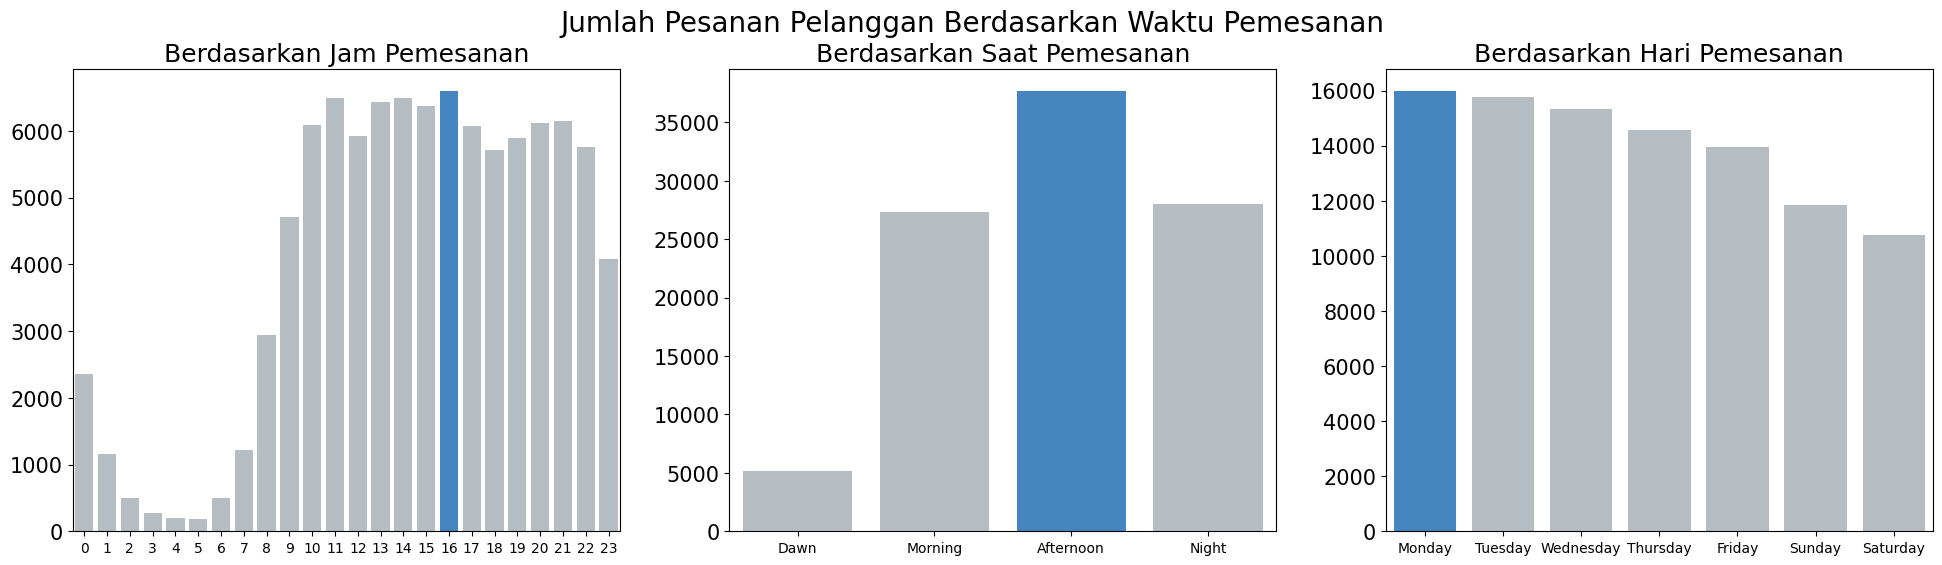

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="hour_order",
            y="order_id",
            data= count_hour_order,
            palette= set_custom_palette(count_hour_order.order_id),
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Jam Pemesanan", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="daytime_order",
            y="order_id",
            data= all_joined_df.groupby('daytime_order').order_id.nunique().reset_index(),
            palette= set_custom_palette(count_daytime_order.order_id),
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Saat Pemesanan", loc="center", fontsize=18)
ax[1].tick_params(axis ='y', labelsize=15)

sns.barplot(x="day_order",
            y="order_id",
            data= all_joined_df.groupby('day_order').order_id.nunique().reset_index().sort_values(by='order_id',ascending=False),
            palette=colors,
            ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Hari Pemesanan", loc="center", fontsize=18)
ax[2].tick_params(axis='y', labelsize=15)

plt.suptitle("Jumlah Pesanan Pelanggan Berdasarkan Waktu Pemesanan", fontsize=20)
plt.show()

Jumlah pemesanan tertinggi didasarkan pada jam pukul 16.00, kemudian pada siang hari, dan pada hari Senin.

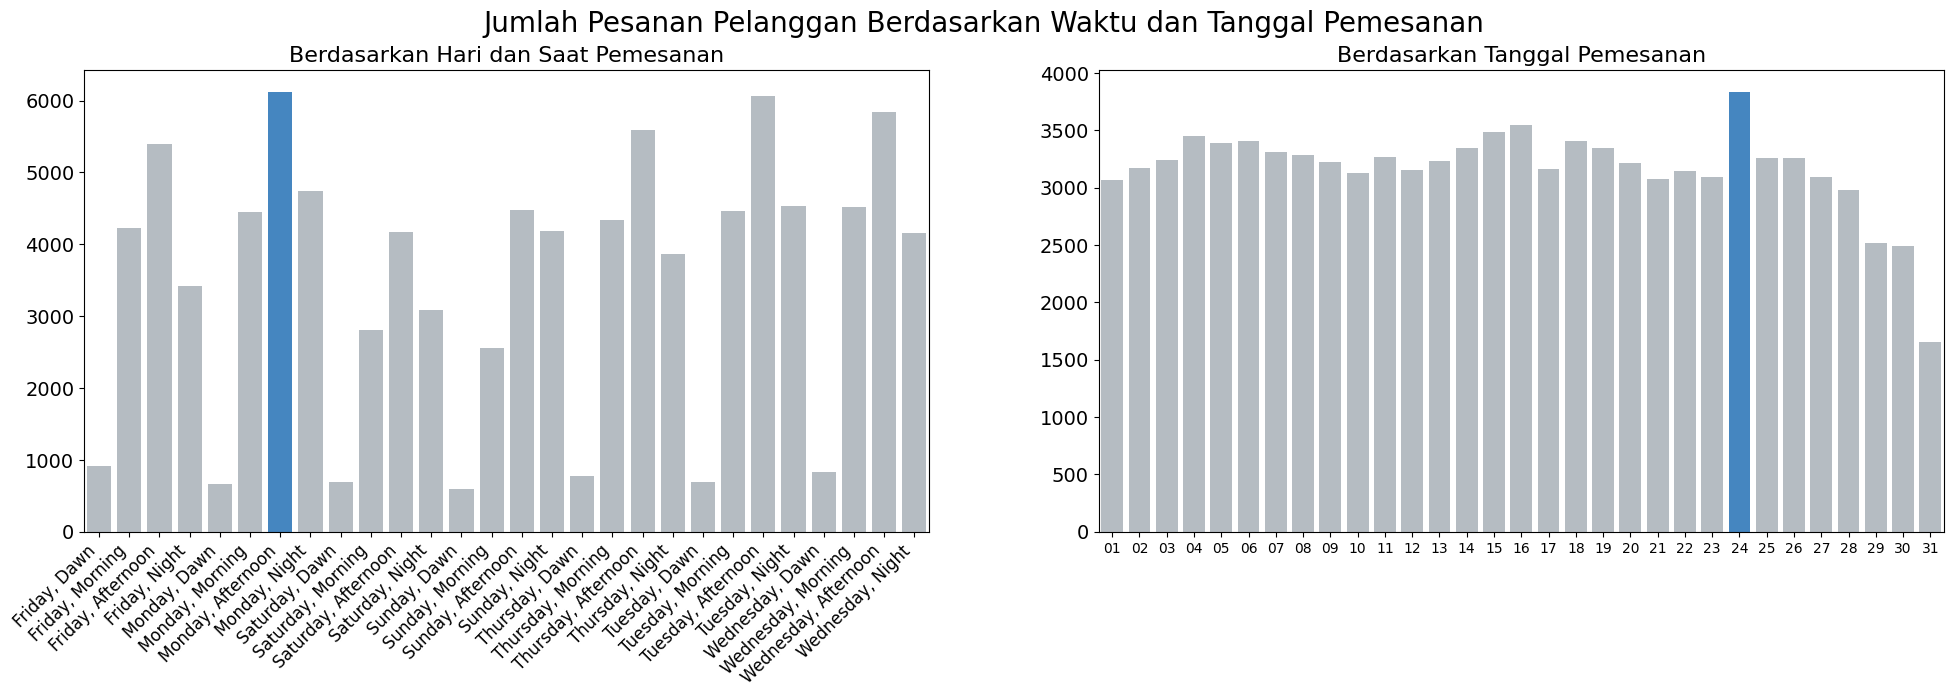

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="time_order",
            y="order_id",
            data= count_time_order,
            palette= set_custom_palette(count_time_order.order_id),
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Hari dan Saat Pemesanan", loc="center", fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
ax[0].tick_params(axis ='y', labelsize=14)

sns.barplot(x="date_order",
            y="order_id",
            data= count_date_order,
            palette= set_custom_palette(count_date_order.order_id),
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Tanggal Pemesanan", loc="center", fontsize=16)
ax[1].tick_params(axis ='y', labelsize=14)

plt.suptitle("Jumlah Pesanan Pelanggan Berdasarkan Waktu dan Tanggal Pemesanan", fontsize=20)
plt.show()

Pemesanan terbanyak dibuat pada hari Senin di siang hari dan pada tanggal 24.

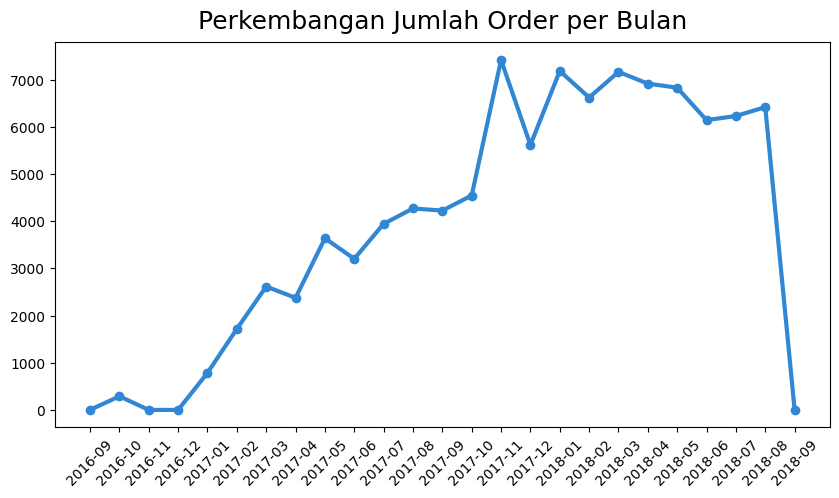

In [140]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders.month_order,
    monthly_orders.count_order,
    marker= 'o',
    linewidth= 3,
    color= "#3187d4"
    )
plt.title("Perkembangan Jumlah Order per Bulan" , loc="center", fontsize=18, pad=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.show()

Jumlah order per bulan berubah, dengan nilai tertingginya terjadi pada bulan November 2017. Setelah itu, fluktuasi yang cenderung stabil berlanjut hingga Agustus 2018.

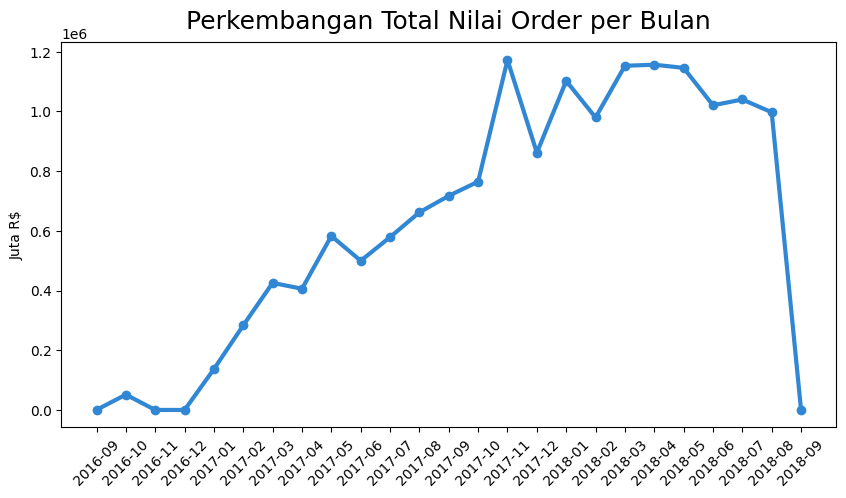

In [141]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders.month_order,
    monthly_orders.sum_order_value,
    marker= 'o',
    linewidth= 3,
    color= "#3187d4"
    )
plt.title("Perkembangan Total Nilai Order per Bulan" , loc="center", fontsize=18, pad=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.ylabel('Juta R$', fontsize=10)

plt.show()

Nilai total order juga telah berubah sesuai dengan jumlah order per bulan. Nilai tertingginya dicapai pada bulan November 2017, tetapi nilai tersebut kemudian mengalami fluktuasi yang cenderung stabil hingga Agustus 2018.

### **Pertanyaan 2:** Siapa pelanggan yang dianggap terbaik, dan bagaimana cara membagi pelanggan berdasarkan pesanan terakhir, frekuensi order, serta nilai total pesanannya?

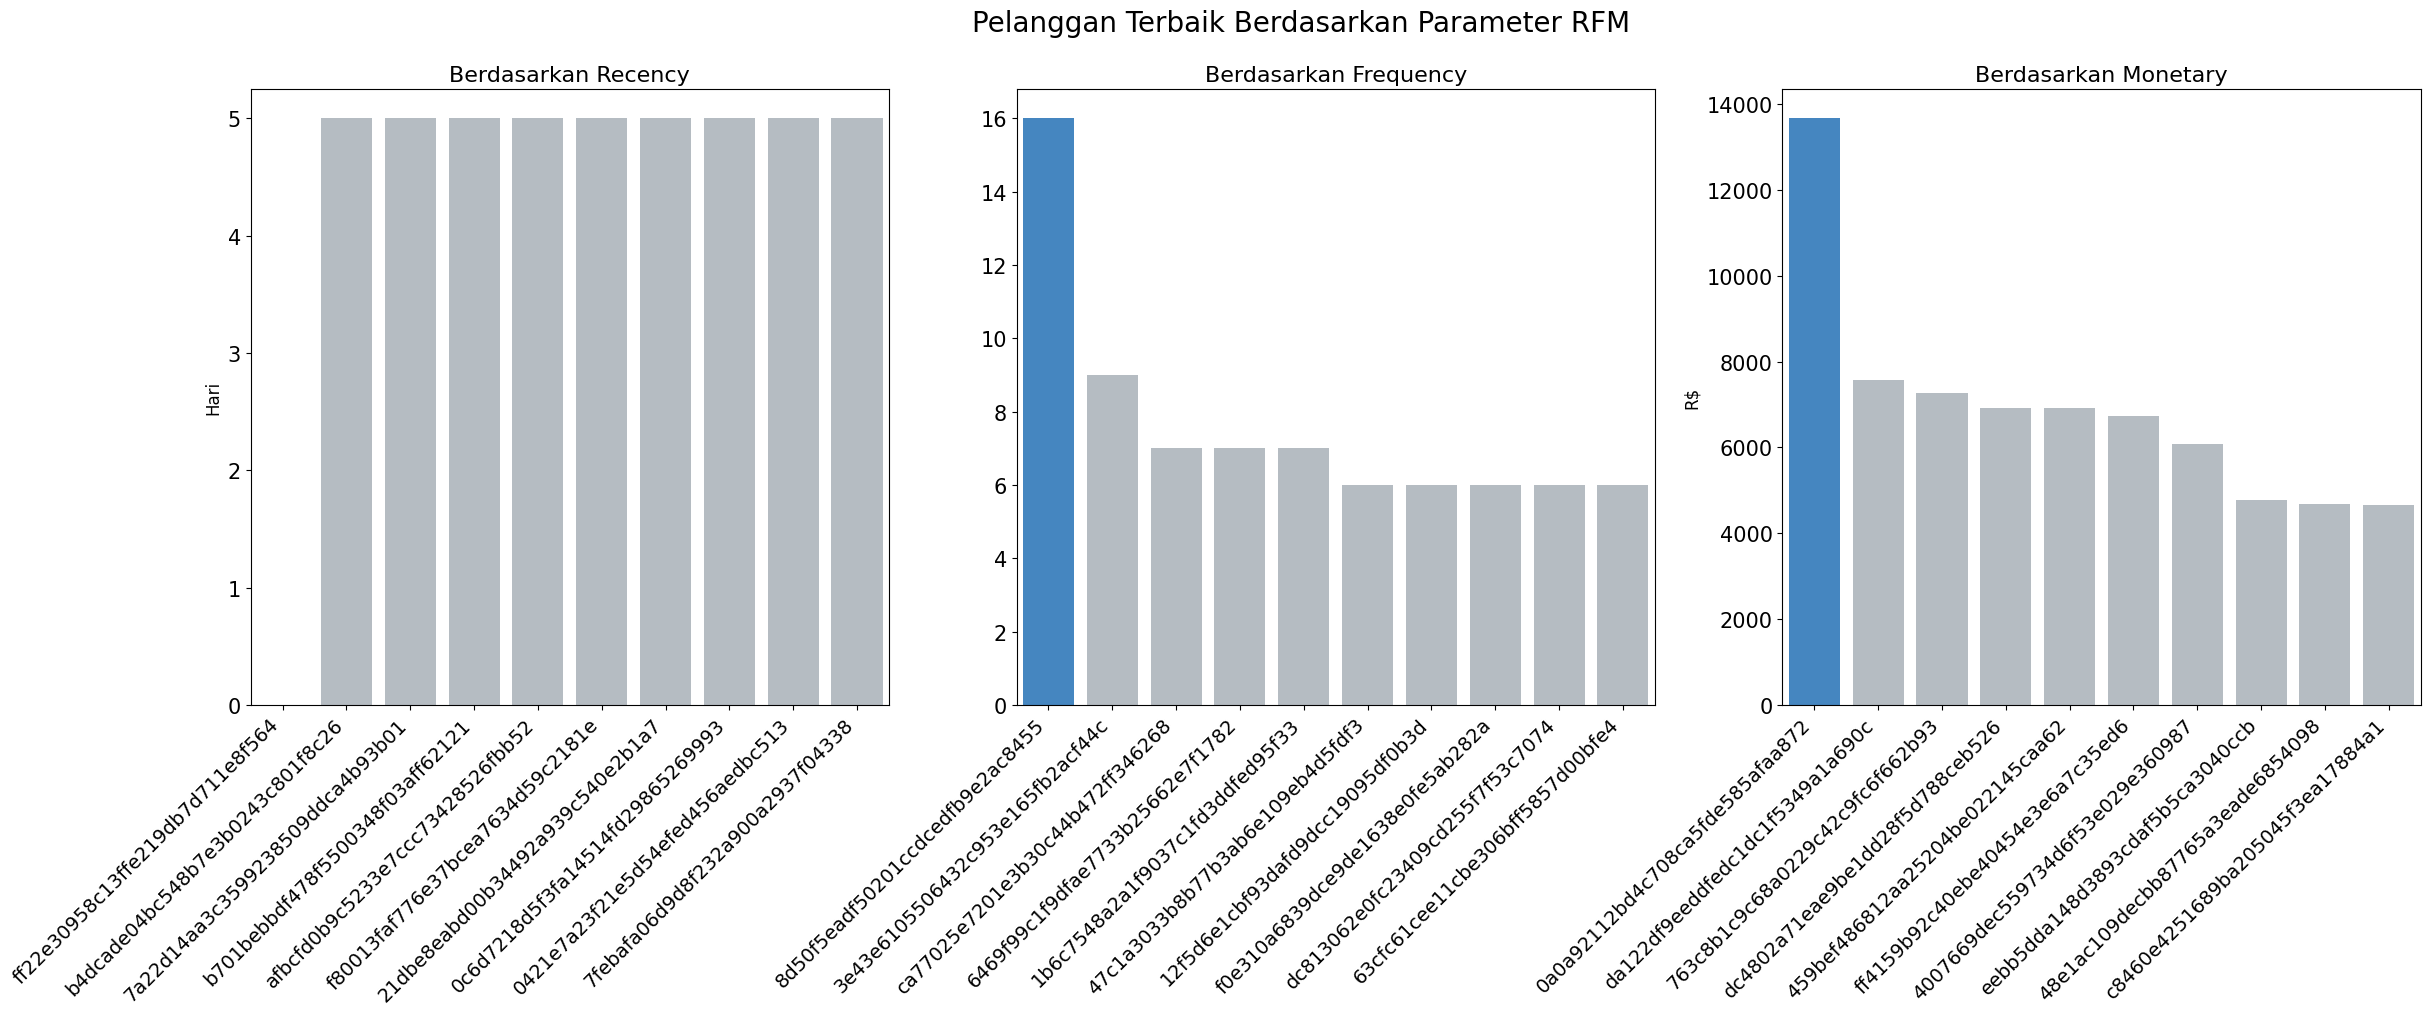

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))
colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="customer_unique_id", y="recency", data= rfm_df.sort_values(by='recency', ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel('Hari', fontsize=12)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency", loc="center", fontsize=16)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="frequency", data= rfm_df.sort_values(by='frequency', ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=16)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="monetary", data= rfm_df.sort_values(by='monetary', ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel('R$', fontsize=12)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=16)
ax[2].tick_params(axis ='y', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM", fontsize=20)
plt.show()

Pelanggan terbaik ditentukan berdasarkan hari terakhir mereka membeli, atau frekuensi, yaitu pelanggan dengan ID ff22e30958c13ffe219db7d711e8f564, kemudian berdasarkan seringnya membeli, yaitu pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455, dan berdasarkan jumlah uang yang dihabiskan, yaitu pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872.

In [143]:
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)

#Normalisasi ranking pelanggan
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,76.165735,48.480781,48.480781
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,75.137656,48.480781,48.480781
2,0000f46a3911fa3c0805444483337064,542,1,86.22,3.562743,48.480781,48.480781
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,28.749882,48.480781,48.480781
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,33.756041,48.480781,48.480781


In [144]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm'] + 0.28 *rfm_df['F_rank_norm'] + 0.57*rfm_df['M_rank_norm'] #Weighting pada masing-masing parameter
rfm_df['RFM_Score'] = (0.05*rfm_df['RFM_Score']).round(2) #Mengubah nilai RFM Score menjadi nilai dengan maksimal 5 dan membulatkannya hingga 2 desimal

rfm_df = rfm_df[['customer_unique_id', 'recency','frequency','monetary','RFM_Score']]
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,2.63
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,2.62
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2.09
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2.28
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2.31


In [146]:
'''
RFM Score > 4.5 : Top Customer
4.5 > RFM Score > 4 : High Value Customer
4> RFM Score > 3 : Medium Value Customer
3> RFM Score > 1.6 : Low Value Customer
RFM Score <1.6 : Lost Customer
'''
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_Score'] > 4.5, "Top Customer", (np.where(
        rfm_df['RFM_Score'] > 4, "High Value Customer",(np.where(
            rfm_df['RFM_Score'] > 3, "Medium Value Customer", np.where(
                rfm_df['RFM_Score'] > 1.6, 'Low Value Customer', 'Lost Customer')))))
)

rfm_df.head(10)

,customer_unique_id,recency,frequency,monetary,RFM_Score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,2.63,Low Value Customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,2.62,Low Value Customer
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2.09,Low Value Customer
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2.28,Low Value Customer
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2.31,Low Value Customer
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,166.98,2.57,Low Value Customer
6,00050ab1314c0e55a6ca13cf7181fecf,136,1,35.38,2.59,Low Value Customer
7,00053a61a98854899e70ed204dd4bafe,187,1,419.18,2.50,Low Value Customer
8,0005e1862207bf6ccc02e4228effd9a0,548,1,150.12,2.08,Low Value Customer
9,0005ef4cd20d2893f0d9fbd94d3c0d97,175,1,129.76,2.52,Low Value Customer


In [147]:
rfm_df.customer_segment.value_counts()

Low Value Customer     92096
Top Customer            1767
High Value Customer     1120
Name: customer_segment, dtype: int64

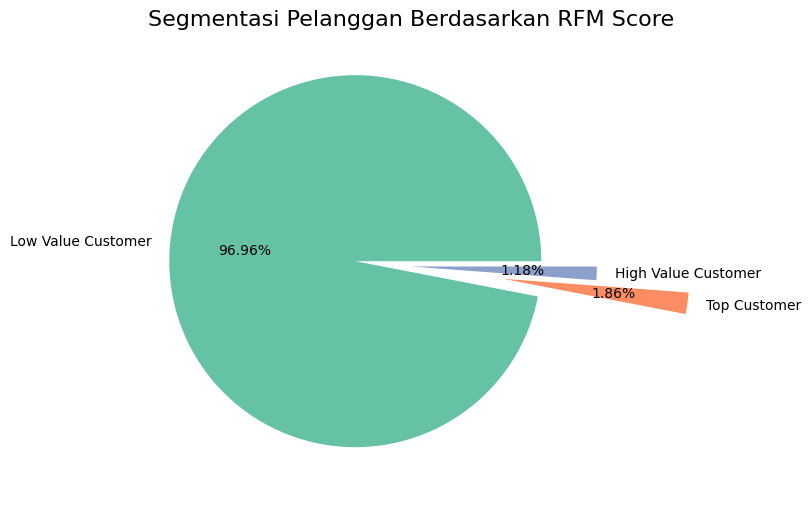

In [148]:
plt.figure(figsize=(6,8))
plt.pie(
    rfm_df.customer_segment.value_counts(),
    labels= rfm_df.customer_segment.value_counts().index,
    autopct= '%1.2f%%',
    explode = [0.3, 0.5, 0],
    colors= sns.color_palette('Set2')
)
plt.title("Segmentasi Pelanggan Berdasarkan RFM Score", loc='center', fontsize=16)
plt.show()

Menurut hasil RFM, sebagian besar pelanggan berada di segmen pelanggan dengan nilai rendah dengan persentase 96,96 persen. Pelanggan dengan nilai tinggi dan pelanggan dengan nilai tinggi di urutan berikutnya.

In [149]:
rfm_df.sort_values(by=['RFM_Score', 'monetary'],ascending=False).head(20)

,customer_unique_id,recency,frequency,monetary,RFM_Score,customer_segment
81925,dc813062e0fc23409cd255f7f53c7074,11,6,1033.62,5.00,Top Customer
52352,8d50f5eadf50201ccdcedfb9e2ac8455,14,16,902.04,4.99,Top Customer
92332,f8bc1d81f395f6239a2a5ab1b9edf1ab,14,3,515.10,4.99,Top Customer
58244,9cc5a07f169a1606fd347a56683e6ea6,12,4,419.25,4.99,Top Customer
45118,795c1622cf7a53d63d324e862349d01c,17,4,354.23,4.99,Top Customer
81851,dc48b0a1b0e6abb6586f322c189f6b93,14,3,327.39,4.99,Top Customer
19638,34b0cd95480e55c2a701293a2b9671b3,6,3,295.57,4.99,Top Customer
85151,e53fd5575f1418397aae732c5755b6fc,14,3,132.03,4.99,Top Customer
83403,e0836a97eaae86ac4adc26fbb334a527,7,3,88.27,4.99,Top Customer
29646,4facc2e6fbc2bffab2fea92d2b4aa7e4,21,4,1760.75,4.98,Top Customer


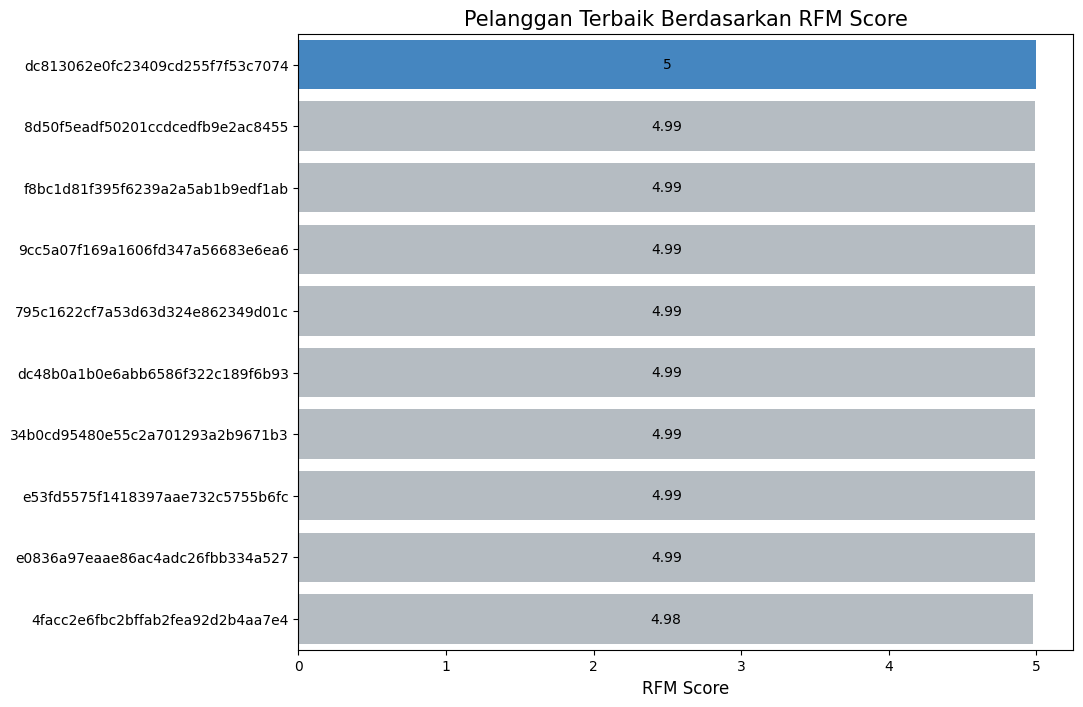

In [150]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="RFM_Score", y="customer_unique_id", data= rfm_df.sort_values(by=['RFM_Score', 'monetary'],ascending=False).head(10), palette=colors)
ax.set_ylabel(None)
ax.set_xlabel('RFM Score', fontsize=12)
ax.set_title("Pelanggan Terbaik Berdasarkan RFM Score", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

Pelanggan dengan skor RFM tertinggi adalah pelanggan dengan ID dc813062e0fc23409cd255f7f53c7074.

## **Conclusion**

- **Conclution pertanyaan 1** : Pemesanan terbanyak didasarkan pada jam pemesanan, yaitu pukul 16.00, kemudian pada hari Senin siang, dan pada tanggal 24 setiap bulan. Jumlah order dan total nilai order telah berubah, dengan nilai tertingginya terjadi pada bulan November 2017. Setelah itu, fluktuasi yang cenderung stabil berlanjut hingga Agustus 2018.

- **Conclution pertanyaan 2** : Pelanggan dengan skor RFM tertinggi adalah pelanggan dengan ID dc813062e0fc23409cd255f7f53c7074. Selain itu, berdasarkan tanggal pembelian terakhir, frekuensi pembelian, dan total nilai pembelian, kami menemukan bahwa 96,96 persen pelanggan termasuk dalam segmen Low Value Customer, 1,86 persen pelanggan termasuk dalam segmen Top Customer, dan 1,18% pelanggan termasuk dalam segmen High Value Customer dari total pelanggan 94.983.